In [3]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from gym.wrappers import GrayScaleObservation

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)

In [5]:
from stable_baselines3.common.vec_env import DummyVecEnv

In [6]:
env = DummyVecEnv([lambda: env])

In [7]:
state = env.reset()
print(state.shape)

(1, 240, 256, 1)


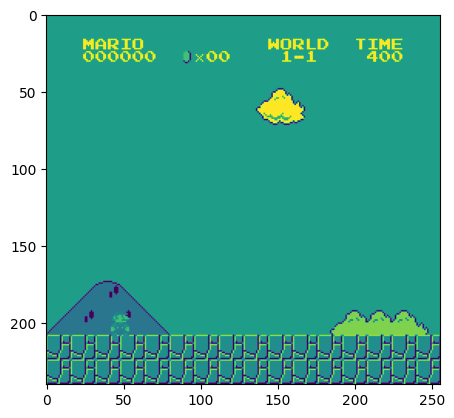

In [8]:
plt.imshow(state[0])

In [9]:
from stable_baselines3.common.vec_env import VecFrameStack

In [10]:
env = VecFrameStack(env,4,channels_order='last')

In [11]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)


In [12]:
print(state)

[[[[  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]
   ...
   [  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]]

  [[  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]
   ...
   [  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]]

  [[  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]
   ...
   [  0   0   0 140]
   [  0   0   0 140]
   [  0   0   0 140]]

  ...

  [[  0   0   0 214]
   [  0   0   0 124]
   [  0   0   0 124]
   ...
   [  0   0   0 124]
   [  0   0   0 124]
   [  0   0   0   0]]

  [[  0   0   0 214]
   [  0   0   0 124]
   [  0   0   0 124]
   ...
   [  0   0   0 124]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0 124]
   [  0   0   0   0]
   [  0   0   0   0]
   ...
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0 124]]]]


In [13]:
print(state[0])

[[[  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]
  ...
  [  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]]

 [[  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]
  ...
  [  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]]

 [[  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]
  ...
  [  0   0   0 140]
  [  0   0   0 140]
  [  0   0   0 140]]

 ...

 [[  0   0   0 214]
  [  0   0   0 124]
  [  0   0   0 124]
  ...
  [  0   0   0 124]
  [  0   0   0 124]
  [  0   0   0   0]]

 [[  0   0   0 214]
  [  0   0   0 124]
  [  0   0   0 124]
  ...
  [  0   0   0 124]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0 124]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0 124]]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


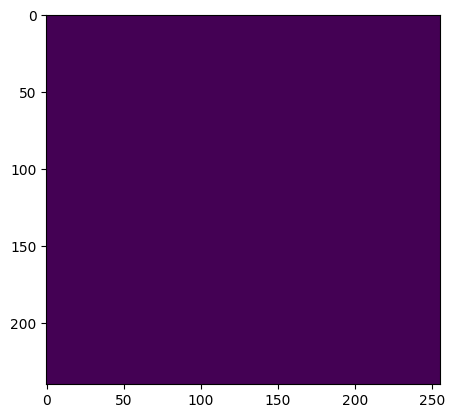

In [14]:
plt.imshow(state[0][:,:,0])
print(state[0][:,:,0])

[[140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 ...
 [214 124 124 ... 124 124   0]
 [214 124 124 ... 124   0   0]
 [124   0   0 ...   0   0 124]]


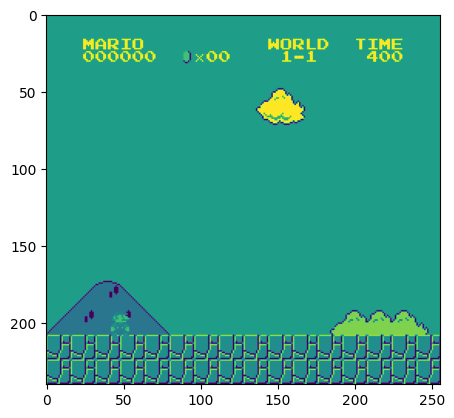

In [15]:
plt.imshow(state[0][:,:,3])
print(state[0][:,:,3])

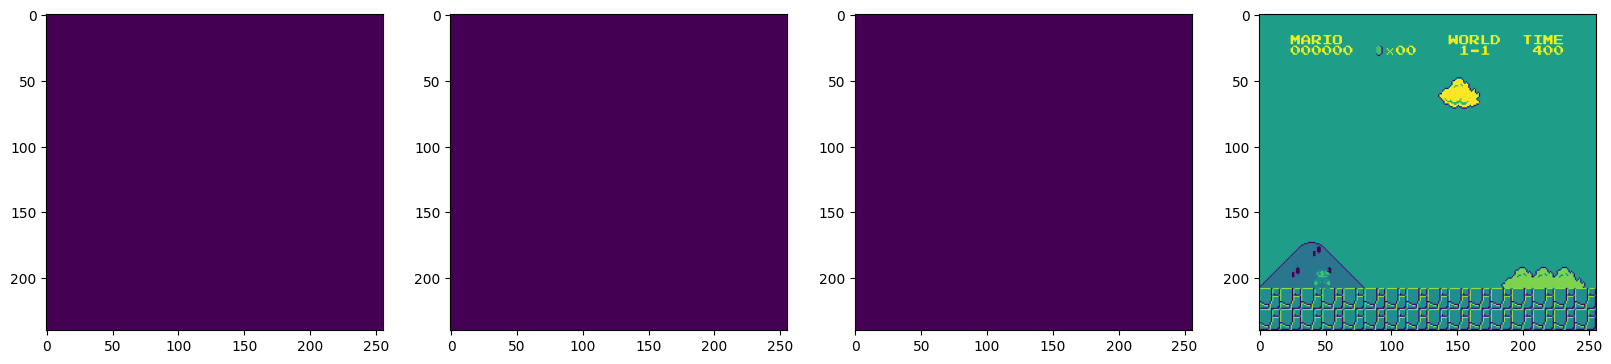

In [16]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [17]:
def show_img_4(state):
    plt.figure(figsize=(20,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx])
    plt.show()

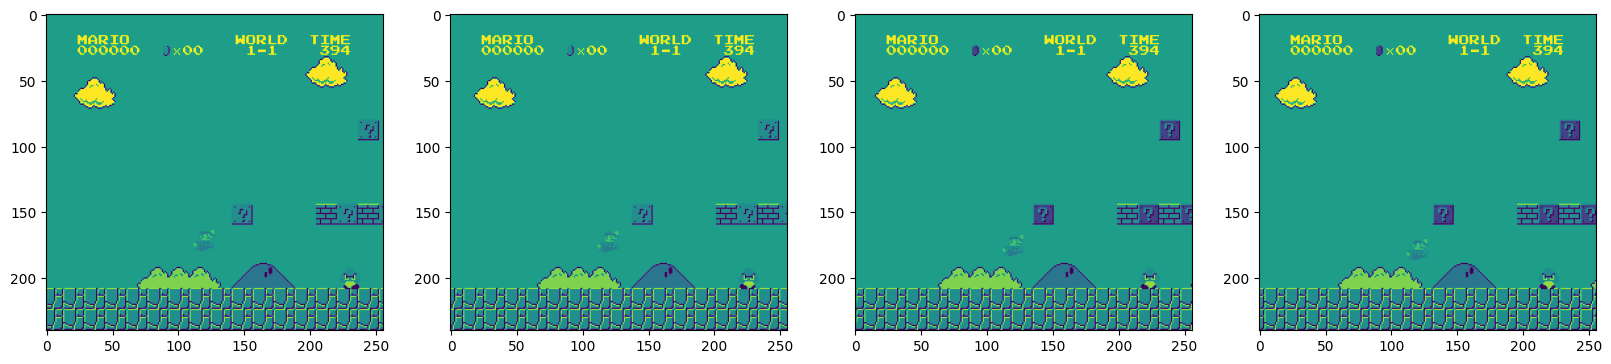

In [22]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

In [19]:
from stable_baselines3.common.monitor import Monitor

In [23]:
monitor_dir = r'./monitor_log/'
env = Monitor(env,monitor_dir)

AttributeError: 'DummyVecEnv' object has no attribute 'spec'

五、整理引入

In [24]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecFrameStack
import os

In [25]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

monitor_dir = r'./monitor_log/'
os.makedirs(monitor_dir,exist_ok=True)
env = Monitor(env,monitor_dir)

env = GrayScaleObservation(env,keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env,4,channels_order='last')

In [26]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)
